In [1]:
%matplotlib inline
%load_ext watermark
%watermark -v -m -p numpy,scipy,pandas,matplotlib,seaborn,sklearn,pywt 

CPython 3.5.2
IPython 5.1.0

numpy 1.11.1
scipy 0.18.0
pandas 0.18.1
matplotlib 1.5.1
seaborn 0.7.1
sklearn 0.19.dev0
pywt 0.4.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)
system     : Darwin
release    : 16.0.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from collections import Counter
#save plot display settings to change back to when done plotting with seaborn
inline_rc = dict(mpl.rcParams)

from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

In [3]:
dataset_training = pd.read_pickle('data/Dataset_all_training.pkl')
dataset_training.head()

,Count_Fault_Crossing,Dist_2_CDI,distance_to_Fault_Network,Distance_to_AuGt150,Distance_to_CuGt2000,Distance_to_high_curvature_along_faults,GRAV_effective_density,Gravity_1VD,Gravity_Analytic_Signal,Kpct,PseudoLitho,RockCode,Thppm,TMI_1VD,TMI_Analytic_Signal,TMI_effective_susc,U_div_Th,Uppm,Outcome,class
0,0.167869,1951.89,334.578,19599.8,5135.24,3073.00,0.230058,0.000756,0.001131,0.517956,4,1,11.5835,-0.000482,0.102906,0.332257,0.134642,1.55958,0.0,0
1,0.159692,1951.58,279.660,19523.0,5235.09,2997.63,0.229627,0.000765,0.001162,0.523862,4,1,11.7754,0.032979,0.172299,0.332192,0.135796,1.59911,0.0,0
2,0.153920,1951.30,224.744,19446.4,5334.95,2923.75,0.228073,0.000773,0.001192,0.505136,4,1,11.6611,0.099562,0.241855,0.330549,0.137801,1.60679,0.0,0
3,0.148629,1951.05,169.826,19370.0,5434.81,2851.46,0.225421,0.000782,0.001222,0.472606,4,1,11.1736,0.188753,0.307704,0.330063,0.139802,1.56175,0.0,0
4,0.143338,1950.88,114.908,19293.8,5534.67,2780.88,0.222033,0.000790,0.001253,0.442808,4,1,10.5124,0.284289,0.365465,0.328266,0.142308,1.49541,0.0,0


In [4]:
# x = dataset_training.drop(['Outcome','class'], axis=1).values
x = dataset_training.drop(['Outcome','class','Distance_to_AuGt150','Distance_to_CuGt2000'], axis=1).values
y = dataset_training[['Outcome','class']].values
y1 = y[:,0]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        x, y1, train_size=0.66, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(Counter(y_test).values())
print(Counter(y_train).values())

(494244, 16)
(494244,)
(254612, 16)
(254612,)
dict_values([253775, 25, 27, 30, 22, 31, 24, 23, 24, 25, 28, 28, 12, 22, 25, 25, 17, 27, 32, 36, 24, 24, 17, 34, 25, 25, 23, 25, 26, 24, 31, 27, 25, 24])
dict_values([492631, 53, 53, 49, 56, 49, 55, 41, 50, 52, 51, 49, 36, 52, 54, 52, 20, 42, 47, 41, 54, 46, 43, 34, 55, 54, 56, 56, 53, 55, 47, 48, 54, 56])


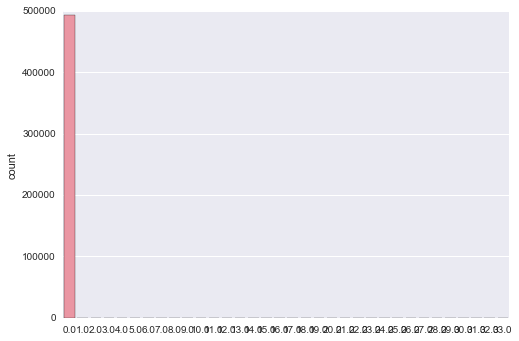

In [6]:
import seaborn as sns
# sns.set()
sns.countplot(y_train)

In [7]:
# from http://stackoverflow.com/a/23479973

def balanced_subsample(x,y,subsample_size=1.0):

    class_xs = []
    min_elems = None

    for yi in np.unique(y):
        elems = x[(y == yi)]
        class_xs.append((yi, elems))
        if min_elems == None or elems.shape[0] < min_elems:
            min_elems = elems.shape[0]

    use_elems = min_elems
    if subsample_size < 1:
        use_elems = int(min_elems*subsample_size)

    xs = []
    ys = []

    for ci,this_xs in class_xs:
        if len(this_xs) > use_elems:
            np.random.shuffle(this_xs)

        x_ = this_xs[:use_elems]
        y_ = np.empty(use_elems)
        y_.fill(ci)

        xs.append(x_)
        ys.append(y_)

    xs = np.concatenate(xs)
    ys = np.concatenate(ys)

    return xs,ys

(680, 16)
(680,)


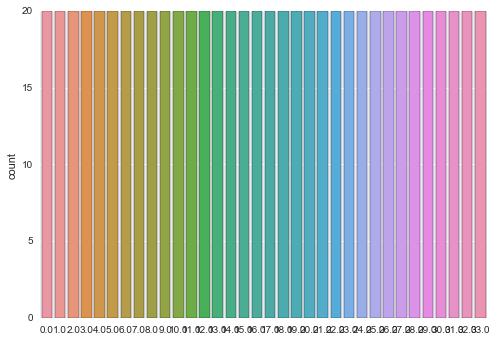

In [8]:
Xs_train,ys_train = balanced_subsample(X_train,y_train,subsample_size=1.0)

print(Xs_train.shape)
print(ys_train.shape)
sns.countplot(ys_train)

In [9]:
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [10]:
classifiers = [
    ensemble.RandomForestClassifier(n_estimators=100),
    ensemble.GradientBoostingClassifier(n_estimators=100, max_depth=30),
    ensemble.AdaBoostClassifier()]

RandomForestClassifier
****Results****

Accuracy: 62.4362%
Precision: 62.4362%
Recall: 62.4362%
F1 score: 62.4362%

Classification report:

             precision    recall  f1-score   support

        0.0       1.00      0.62      0.77    253775
        1.0       0.01      1.00      0.02        25
        2.0       0.03      1.00      0.06        27
        3.0       0.01      1.00      0.01        30
        4.0       0.01      1.00      0.02        22
        5.0       0.02      1.00      0.03        31
        6.0       0.00      1.00      0.01        24
        7.0       0.01      1.00      0.01        23
        8.0       0.01      1.00      0.03        24
        9.0       0.01      1.00      0.01        25
       10.0       0.01      1.00      0.02        28
       11.0       0.01      1.00      0.01        28
       12.0       0.00      0.83      0.01        12
       13.0       0.01      1.00      0.03        22
       14.0       0.01      1.00      0.03        25
       15.0

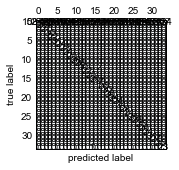

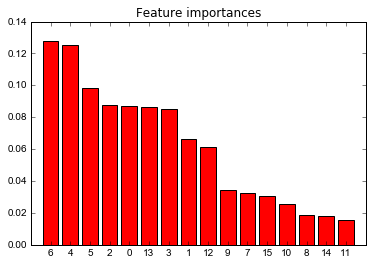

GradientBoostingClassifier
****Results****

Accuracy: 48.5955%
Precision: 48.5955%
Recall: 48.5955%
F1 score: 48.5955%

Classification report:

             precision    recall  f1-score   support

        0.0       1.00      0.48      0.65    253775
        1.0       0.01      1.00      0.02        25
        2.0       0.02      0.96      0.04        27
        3.0       0.01      1.00      0.01        30
        4.0       0.01      1.00      0.02        22
        5.0       0.01      1.00      0.02        31
        6.0       0.00      1.00      0.01        24
        7.0       0.02      1.00      0.03        23
        8.0       0.01      0.92      0.02        24
        9.0       0.00      1.00      0.00        25
       10.0       0.01      0.89      0.02        28
       11.0       0.00      0.86      0.01        28
       12.0       0.00      0.83      0.01        12
       13.0       0.01      0.86      0.01        22
       14.0       0.11      0.92      0.20        25
       

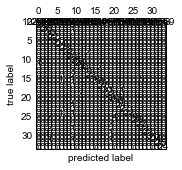

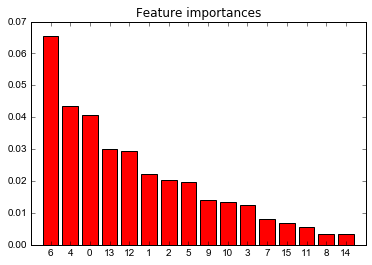

AdaBoostClassifier
****Results****

Accuracy: 59.0813%
Precision: 59.0813%
Recall: 59.0813%
F1 score: 59.0813%

Classification report:

             precision    recall  f1-score   support

        0.0       1.00      0.59      0.74    253775
        1.0       0.00      0.00      0.00        25
        2.0       0.00      0.00      0.00        27
        3.0       0.00      0.00      0.00        30
        4.0       0.00      0.00      0.00        22
        5.0       0.08      1.00      0.16        31
        6.0       0.00      0.00      0.00        24
        7.0       0.00      1.00      0.00        23
        8.0       0.00      0.00      0.00        24
        9.0       0.00      0.00      0.00        25
       10.0       0.00      0.00      0.00        28
       11.0       0.00      0.00      0.00        28
       12.0       0.00      0.00      0.00        12
       13.0       0.00      0.00      0.00        22
       14.0       0.00      0.00      0.00        25
       15.0    

/Users/lorenzoperozzi/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


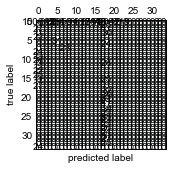

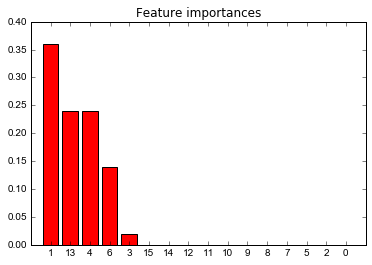

In [11]:
sns.reset_orig()
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Precision", "Recall", "F1-score"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(Xs_train, ys_train)
    name = clf.__class__.__name__
    importances = clf.feature_importances_
#     std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]
    print("="*30)
    print(name)
    
    print('****Results****\n')
    test_predictions = clf.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, test_predictions)
    print("Accuracy: {:.4%}".format(accuracy))
   

    precision = metrics.precision_score(y_test, test_predictions, average='micro')
    print("Precision: {:.4%}".format(precision))
    
    recall = metrics.recall_score(y_test, test_predictions, average='micro')
    print("Recall: {:.4%}".format(recall))
    
    f1 = metrics.f1_score(y_test, test_predictions, average='micro')
    print("F1 score: {:.4%}\n".format(f1))
    
    print('Classification report:\n')
    print(classification_report(y_test, test_predictions))
    
    confmat = confusion_matrix(y_true=y_test, y_pred=test_predictions)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()
    
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices],
       color="r",  align="center")
    plt.xticks(range(X_train.shape[1]), indices)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()
       
    log_entry = pd.DataFrame([[name, accuracy*100, precision*100, recall*100, f1*100]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)